In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [9]:
from source.read_HAR_dataset import read_har_dataset, har_dimensions, har_activities, har_activities_map, har_ind_IDS



data = read_har_dataset('./datasets/HAR-UML20/', train_ids=har_ind_IDS[:-2], test_ids=har_ind_IDS[-2:], val_ids=[])

ids_train, X_train, y_train, I_train, train_kcal_MET = data['train']

ids_val, X_val, y_val, I_val, val_kcal_MET = data['val']

ids_test, X_test, y_test, I_test, test_kcal_MET = data['test']

IDS: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Train IDS: [0, 1, 2, 3, 4, 5, 6, 7]
Test IDS: [8, 9]
Val IDS: []


In [10]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7140, 200, 9)
(1260, 200, 9)
(0,)


In [130]:
from source.utils import  filter_dimensions
dimensions = ['Accelerometer-X', 'Accelerometer-Y', 'Accelerometer-Z', 'Gyrometer-X', 'Gyrometer-Y', 'Gyrometer-Z']

X_train_f = filter_dimensions(X_train, har_dimensions, dimensions)
X_test_f = filter_dimensions(X_test, har_dimensions, dimensions)
X_val_f = filter_dimensions(X_val, har_dimensions, dimensions)

In [172]:
from source.tserie import TSerie

mts_train = TSerie(X = X_train_f, y = y_train, I = I_train, dimensions = har_dimensions, classLabels=har_activities_map)
mts_test = TSerie(X = X_test_f, y = y_test, I = I_test, dimensions = har_dimensions, classLabels=har_activities_map)
# mts.reviewByClass(dims = [0, 1, 2], title='Accelerometer')
# mts.reviewByClass(dims = [3, 4, 5], title='Gyrometer')

# mts.reviewByUser(dims = [0, 1, 2], title='Accelerometer')
# mts.reviewByUser(dims = [3, 4, 5], title='Gyrometer')

Loaded mts - N: 5040, T: 200, D: 6 
Loaded mts - N: 1260, T: 200, D: 6 


In [179]:
mts_train.folding_features_v2()
mts_test.folding_features_v2()

Features shape: (5040, 1200)
Features shape: (1260, 1200)


In [180]:
import umap


reducer = umap.UMAP(n_components=32, metric='braycurtis')
embeddings_train = reducer.fit_transform(mts_train.features, y = mts.y)
embeddings_test = reducer.transform(mts_test.features)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [187]:
from source.utils import classify_dataset

pred_train, pred_test = classify_dataset(embeddings_train, y_train, embeddings_test, y_test)

/home/texs/anaconda3/envs/contrastive/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


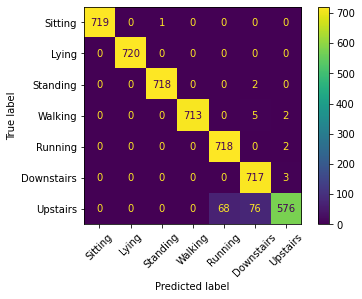

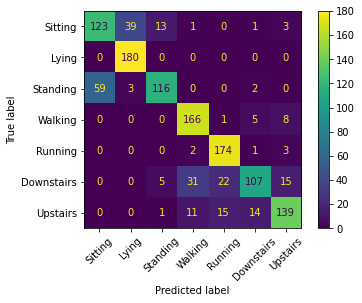

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions (y_train, pred_train, display_labels= har_activities, xticks_rotation=45)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels= har_activities, xticks_rotation=45)
